In [1]:
from sklearn.datasets import *
from clustering.kmesa import KMESA
from clustering.utils import create_circle, create_filled_circle, load_different_density_clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [4]:
blob1, _ = make_blobs(n_samples=30, centers=1, center_box=(5, 7.5), cluster_std=0.5)
blob2, _ = make_blobs(n_samples=70, centers=1, center_box=(-8, 2.5), cluster_std=1.5)

big_circle = create_filled_circle(center=(1, 2.5), radius=2, n_samples_outer=120)
medium_circle = create_filled_circle(center=(-1, -3), radius=1.5, n_samples_outer=32)
small_circle = create_filled_circle(center=(5.8, 1.8), radius=0.9, n_samples_outer=15)
dense_circle = create_filled_circle(center=(-4.5, 5.5), radius=0.5, n_samples_outer=50)

rand = np.random.random((60, 2))
rand[:, 0] = rand[:, 0] * (8 - 2.5) + 2.5
rand[:, 1] = rand[:, 1] * (-0.5 - (-6)) + (-6)

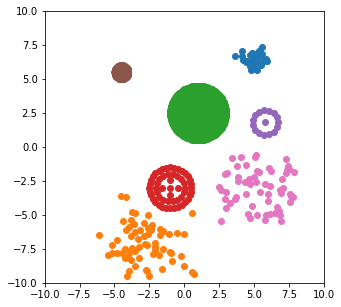

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(blob1[:, 0], blob1[:, 1])
plt.scatter(blob2[:, 0], blob2[:, 1])
plt.scatter(big_circle[:, 0], big_circle[:, 1])
plt.scatter(medium_circle[:, 0], medium_circle[:, 1])
plt.scatter(small_circle[:, 0], small_circle[:, 1])
plt.scatter(dense_circle[:, 0], dense_circle[:, 1])
plt.scatter(rand[:, 0], rand[:, 1])

plt.xlim(-10, 10)
plt.ylim(-10, 10)

fig.savefig('7_density')

In [6]:
scaler = MinMaxScaler()

X = np.concatenate([blob1, blob2, big_circle, medium_circle, small_circle, dense_circle, rand])
X_scaled = scaler.fit_transform(X)

print(f'Number of samples: {X.shape[0]}')
print(X_scaled[:5, 0])

Number of samples: 1598
[0.7357557  0.81860667 0.79519391 0.80219432 0.69626928]


--------------- Algorithm details ---------------
    * Type: KMESA
    * Number of clusters (k): 7
    * Centroid initialization method: random
    * Initial centroids (specified): False
    * Number of initialization repetition: 20
    * Maximum iterations: 300
    * Convergence tolerance: 0.001
    * Empty clusters resolution method: random
    * Annealing method: random
    * Annealing probability function: sqrt
    * Annealing probability alpha: 6
    * Annealing weight function: flex
    * Annealing weight beta: 0.2
    * Convergence tracking: True
    * Annealing tracking: True
    * ECR tracking: False
    * Tracking scaler: MinMaxScaler
-------------------------------------------------


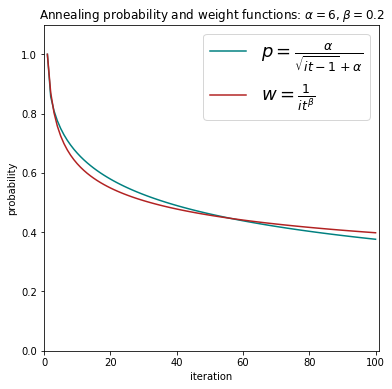

In [10]:
est = KMESA(k_clusters=7,
             n_init=20,
             tol=1e-3,
             annealing_method='carousel',
             annealing_prob_function='sqrt',
             alpha=6,
             annealing_weight_function='flex',
             beta=0.2,
             convergence_tracking=True,
             annealing_tracking=True,
             tracking_scaler=scaler
             )
est.print_details()
est.plot_annealing_functions(n_iter=100)
#

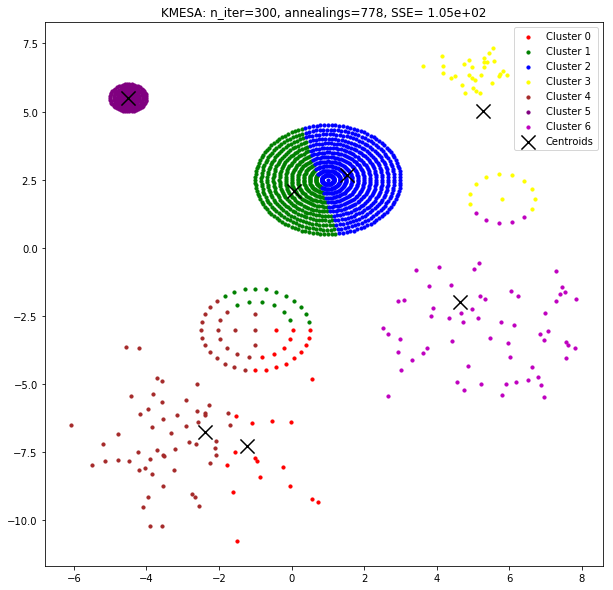

------------- KMESA clustering -------------
    * Iterations before convergence: 300
    * Total empty cluster resolutions: 3
    * Total annealings: 778
    * Sum of squared error:  1.05e+02
    * Time elapsed: 4min 37s
 ---------------------------------------------


In [11]:
est.fit(X_scaled)
est.plot_clustered_data(X, out_file='KMESA_density_carousel_annealing')
est.print_clustering_info()

In [12]:
# est.plot_tracking_history(X, show_iter_mod=10, out_file='KMESA_density')

In [13]:
methods = ['random', 'max', 'min', 'cluster_own', 'cluster_other', 'cluster_mean',
           'centroid_split', 'centroid_gather', 'maxmin', 'carousel']
labels = []
inertias = []

for method in methods:
    est = KMESA(k_clusters=7,
             n_init=5,
             tol=1e-3,
             annealing_method=method,
             annealing_prob_function='sqrt',
             alpha=6,
             annealing_weight_function='flex',
             beta=0.2,
             convergence_tracking=True,
             annealing_tracking=True,
             tracking_scaler=scaler
             )
    est.fit(X_scaled)
    labels.append(est.labels_)
    inertias.append(est.inertia_)

    print(f'\n{method} annealing:')
    est.print_clustering_info()


random annealing:
------------- KMESA clustering -------------
    * Iterations before convergence: 300
    * Total empty cluster resolutions: 3
    * Total annealings: 788
    * Sum of squared error:  1e+02
    * Time elapsed: 1min 6s
 ---------------------------------------------

max annealing:
------------- KMESA clustering -------------
    * Iterations before convergence: 300
    * Total empty cluster resolutions: 1
    * Total annealings: 762
    * Sum of squared error:  1.12e+02
    * Time elapsed: 1min 4s
 ---------------------------------------------

min annealing:
------------- KMESA clustering -------------
    * Iterations before convergence: 191
    * Total empty cluster resolutions: 0
    * Total annealings: 563
    * Sum of squared error:  95.5
    * Time elapsed: 43s 941ms
 ---------------------------------------------

cluster_own annealing:
------------- KMESA clustering -------------
    * Iterations before convergence: 300
    * Total empty cluster resolutions: 1

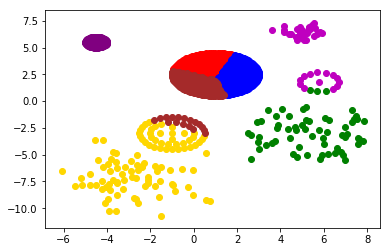

In [14]:
best_index = np.argmin(inertias)
best_labels = labels[best_index]
colors = ['red', 'green', 'blue', 'gold', 'm', 'brown', 'purple', 'teal']

for label in range(7):
    cluster = X[np.where(best_labels == label)]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label])